In [3]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)


# importing cleaned and filtered dataframes

c_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_dataframe', index_col=0)
f_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_filtered_dataframe', index_col=0)



Take a look at out target varriable "Price"


In [4]:
f_df = f_df[f_df['price'] > f_df['price'].quantile(.05)]
#f_df = f_df[f_df['condition'] > f_df['condition'].quantile(.05)]
f_df.describe()

,price,yr_renovated,yr_built,condition,grade,zipcode,lat,long,cat_zipcode
count,16412.00,413.00,16412.00,16412.00,16412.00,16412.00,16412.00,16412.00,16412.00
mean,421878.06,1993.28,1971.20,3.40,4.37,98079.34,47.55,-122.22,98079.34
std,131862.25,17.12,28.55,0.64,0.85,52.94,0.15,0.14,52.94
min,202950.00,1934.00,1900.00,1.00,0.00,98001.00,47.16,-122.52,98001.00
25%,312000.00,1984.00,1952.00,3.00,4.00,98033.00,47.45,-122.33,98033.00
50%,409900.00,1996.00,1975.00,3.00,4.00,98065.00,47.56,-122.24,98065.00
75%,525000.00,2007.00,1995.00,4.00,5.00,98118.00,47.68,-122.13,98118.00
max,700180.00,2015.00,2015.00,5.00,8.00,98199.00,47.78,-121.32,98199.00


In [5]:
c_df = c_df[c_df['price'] < c_df['price'].quantile(.97)]

c_matrix = c_df.corr()
c_matrix['price']


price           1.00
yr_renovated    0.20
yr_built        0.06
condition       0.04
grade           0.66
zipcode        -0.02
lat             0.40
long            0.06
cat_zipcode    -0.02
Name: price, dtype: float64

In [6]:
drop_df = c_df.dropna()

In [7]:
drop_df.shape

(588, 16)

In [8]:
f_df = f_df[f_df['price'] < f_df['price'].quantile(.97)]

f_matrix = f_df.corr()
f_matrix['price']

price          1.00
yr_renovated   0.06
yr_built       0.01
condition      0.01
grade          0.44
zipcode        0.03
lat            0.46
long           0.06
cat_zipcode    0.03
Name: price, dtype: float64

In [9]:
f_df

,price,date,yr_renovated,yr_built,condition,grade,view,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,221900.00,10/13/2014,nan,1955,3,4,NONE,NaN,98178,47.51,-122.26,NaN,NONE,Average,7 Average,98178
1,538000.00,12/9/2014,1991.00,1951,3,4,NONE,NO,98125,47.72,-122.32,NO,NONE,Average,7 Average,98125
3,604000.00,12/9/2014,nan,1965,5,4,NONE,NO,98136,47.52,-122.39,NO,NONE,Very Good,7 Average,98136
4,510000.00,2/18/2015,nan,1987,3,5,NONE,NO,98074,47.62,-122.05,NO,NONE,Average,8 Good,98074
6,257500.00,6/27/2014,nan,1995,3,4,NONE,NO,98003,47.31,-122.33,NO,NONE,Average,7 Average,98003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,5/21/2014,nan,2009,3,5,NONE,NO,98103,47.70,-122.35,NO,NONE,Average,8 Good,98103
21593,400000.00,2/23/2015,nan,2014,3,5,NONE,NO,98146,47.51,-122.36,NO,NONE,Average,8 Good,98146
21594,402101.00,6/23/2014,nan,2009,3,4,NONE,NO,98144,47.59,-122.30,NO,NONE,Average,7 Average,98144
21595,400000.00,1/16/2015,nan,2004,3,5,NONE,NaN,98027,47.53,-122.07,NaN,NONE,Average,8 Good,98027


In [10]:

#Zipcode

#Train/Test Split
X = drop_df.drop(columns=['price', 'yr_built', 'lat', 'long', 'condition'])
y = drop_df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train['yr_renovated'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     10.52
Date:                Fri, 08 Oct 2021   Prob (F-statistic):            0.00128
Time:                        10:54:15   Log-Likelihood:                -5492.9
No. Observations:                 393   AIC:                         1.099e+04
Df Residuals:                     391   BIC:                         1.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.968e+06   1.72e+06     -2.894      0.004   -8.34e+06   -1.59e+06
yr_renovated  2790.4947    860.458      3.243      0.001    1098.792    4482.198
==============================================================================
Omnibus:                       22.949   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.908
Skew:                           0.623   Prob(JB):                     2.37e-06
Kurtosis:                       2.823   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:

# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
train_preds = model.predict(sm.add_constant(X_train['yr_renovated']))
test_preds = model.predict(sm.add_constant(X_test['yr_renovated']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.0262
Test R2: 0.0249
****
Train RMSE: $284,355.14
Test RMSE: $272,701.61
****
Train MAE: $232,627.18
Test MAE: $219,842.09


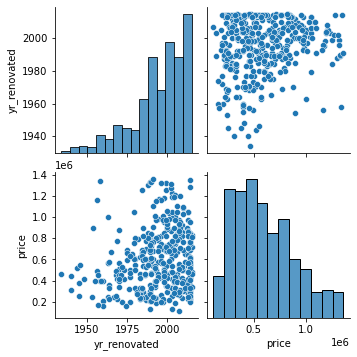

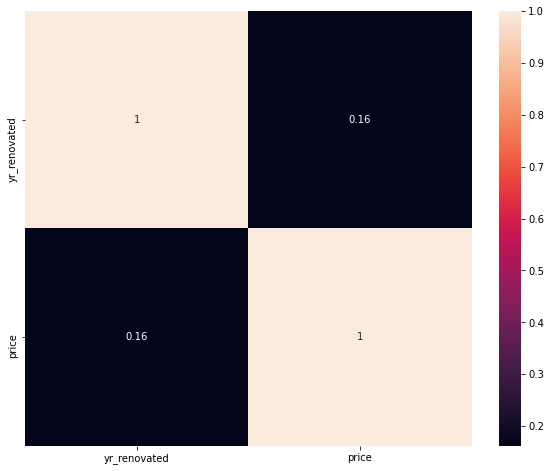

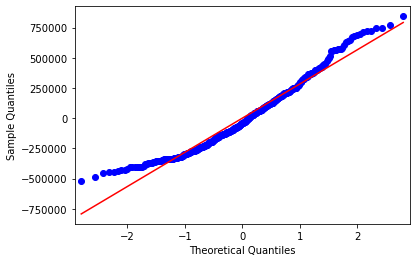

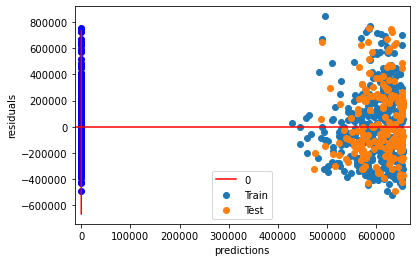

In [12]:

# Let's also check the assumptions of linearity.
functions.check_assumptions(X_train['yr_renovated'], y_train, train_preds, test_preds, y_test)